In [2]:
import cv2
import os
from ultralytics import YOLO
from IPython.display import Image, display


WARNING  Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\123\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
ruta_video = '../raw/Medellin2/IMG_7439.mov'  # 🎥 video en formato .mov
output_dir = '../dataset/images/test'
dataset_path = '../dataset'
frame_interval = 60  # Cada 30 frames (aprox. 1 imagen por segundo si es 30fps)

In [3]:
os.makedirs(output_dir, exist_ok=True)

In [6]:
cap = cv2.VideoCapture(ruta_video)
frame_count = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        frame_path = os.path.join(output_dir, f"frame_{saved_count:04}.jpg")
        cv2.imwrite(frame_path, frame)
        saved_count += 1

    frame_count += 1

cap.release()
print(f"{saved_count} imágenes guardadas en {output_dir}")

310 imágenes guardadas en ../dataset/images/test


Probando modelo v2 prediccion en medellin

In [6]:
model = YOLO('../results/yolo_train/expFinetuneMedellin/weights/best.pt')

results = model.predict(source=f"{dataset_path}/images/test/frame_0064.jpg", save=True)


image 1/1 d:\GIT\NoHelmetNet\src\..\dataset\images\test\frame_0064.jpg: 640x640 7 DHelmets, 3 DHelmetP1Helmets, 1 DNoHelmetP1NoHelmetP2NoHelmet, 1 DHelmetP1NoHelmet, 107.0ms
Speed: 4.0ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


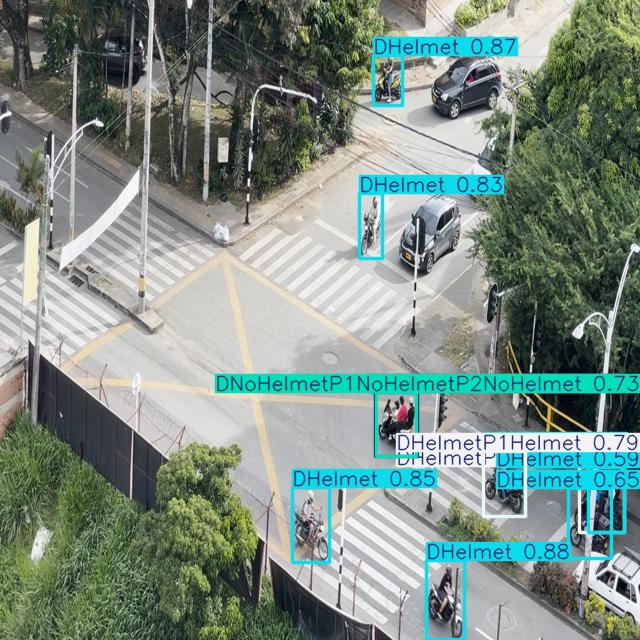

In [7]:
display(Image(filename='runs/detect/predict2/frame_0064.jpg'))